In [5]:
import pandas as pd

In [39]:
LOAN_AMT = 50000
LOAN_TERM = 60 #in month
APR = 0.1510 #in percentage

In [7]:
# APR = (Interest / Loan amount) / Number of days in loan term)) x 365 x 100
# APR * N / 36500 = (I+F) / P

In [41]:
def calculate_interest(P,r):
    '''Calculate simple monthly interest payment
    '''
    
    return P*r/12
    
def calculate_snapshot_monthly(P, r, n):
    '''Calculate amortized monthly payment
    
    P (int): initial principal
    r (float): interest per period (e.g., APR/12)
    n (int): total number of payments
    '''
    r /= 12 #interest per month
    A = P / ( (1+r)**n-1 ) * (r*(1+r)**n)
    
    return A

def find_optimal_schedule(P,r,n,test_range):
    cols = ['Additive Down', 'Total Payment Schedule', 'Total Interest Paid']
    df = pd.DataFrame(columns=cols)
    
    for rng in test_range:
        total_schedule, total_interest = generate_amortization_table(P=P, r=r, n=n, additive=rng, return_range=True)
        df = pd.concat([df, pd.DataFrame([rng, total_schedule, total_interest], index=cols).T])
    
    df.reset_index(drop=True, inplace=True)
    return df

def generate_amortization_table(P,r,n,additive=0,return_range=False):
    '''Generate complete amortization schedule
    
    P (int): initial principal
    r (float): interest per period (e.g., APR/12)
    n (int): total number of payments
    additive (float): additional monthly principal payment
    '''
    cols = ['Beginning Balance', 'Total Pmt', 'Interest', 'Principal', 'Ending Balance', 'Total Interest']
    df = pd.DataFrame(columns=cols)
    M = calculate_snapshot_monthly(P=P, r=r, n=n) #monthly total (this is constant)
    TI = 0
    
    for i in range(n):
        I = calculate_interest(P=P, r=r)
        TI += I
        P_i = P #initial balance
        pr = M-I #principal
        P -= pr+additive #ending balance

        if P < 0: P = 0

        tmp = [P_i, M, I, pr, P, TI]
        tmp = [round(j,2) for j in tmp]
        
        df = pd.concat([df, pd.DataFrame(tmp, index=cols).T])

        if P == 0: #break cycle if ends early
            break

    df = df.reset_index(drop=True)
    df.index += 1
    if return_range:
        return max(df.index), TI
    else:
        return df

In [42]:
df = find_optimal_schedule(P=LOAN_AMT, r=APR, n=LOAN_TERM, test_range=range(0, 3000, 50))

In [43]:
df

,Additive Down,Total Payment Schedule,Total Interest Paid
0,0.0,60.0,21527.360638
1,50.0,57.0,20158.176087
2,100.0,54.0,18957.367713
3,150.0,51.0,17896.702998
4,200.0,49.0,16950.997907
5,250.0,46.0,16105.057509
6,300.0,44.0,15342.21209
7,350.0,42.0,14649.595645
8,400.0,41.0,14020.501605
9,450.0,39.0,13444.890773


c:\ProgramData\Anaconda3\envs\main\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='Additive Down'>

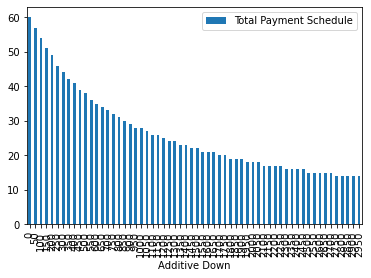

In [31]:
df.plot(x='Additive Down', y='Total Payment Schedule', kind='bar')

In [40]:
generate_amortization_table(P=LOAN_AMT, r=APR, n=LOAN_TERM, additive=0)

,Beginning Balance,Total Pmt,Interest,Principal,Ending Balance,Total Interest
1,50000.0,1192.12,629.17,562.96,49437.04,629.17
2,49437.04,1192.12,622.08,570.04,48867.0,1251.25
3,48867.0,1192.12,614.91,577.21,48289.79,1866.16
4,48289.79,1192.12,607.65,584.48,47705.32,2473.81
5,47705.32,1192.12,600.29,591.83,47113.48,3074.1
6,47113.48,1192.12,592.84,599.28,46514.21,3666.94
7,46514.21,1192.12,585.3,606.82,45907.39,4252.25
8,45907.39,1192.12,577.67,614.45,45292.93,4829.91
9,45292.93,1192.12,569.94,622.19,44670.75,5399.85
10,44670.75,1192.12,562.11,630.02,44040.73,5961.96


In [90]:
calculate_snapshot_monthly(P=LOAN_AMT, r=APR, n=LOAN_TERM)

1192.122677298203

In [62]:
calculate_interest(P=LOAN_AMT, r=APR)

625.0

In [64]:
generate_amortization_table(P=LOAN_AMT, r=APR, n=LOAN_TERM)

564.4965043179393

In [44]:
LOAN_AMT / ( (1+APR)**LOAN_TERM-1 ) * (APR*(1+APR)**LOAN_TERM)

1189.4965043179393

In [7]:
(50000-I)*0.15/12

617.1875